In [1]:
DATA_NAME = 'approx1e5-spaceNet-fourier-red' # size-name-transform-channel
sample_max = int(1e5)

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "plots", "ksplots")).mkdir(exist_ok=True)
CWD

'/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/results/case-studies/spaceNet/wavelet/approx1e5/gray'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *

os.chdir(CWD)
np.random.seed(0)

In [4]:
data_dir = os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle')
group_data_map = pd.read_pickle(data_dir)
GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
full_params = pd.read_csv(Path(os.path.join(CWD, "CSVs", "optimized_params.csv")), index_col='layer')[["total_samples", "initial_r", "initial_eta", "kstest_stat_initial"]]
full_params["total_samples"] = full_params["total_samples"].astype(int)
full_params

,total_samples,initial_r,initial_eta,kstest_stat_initial
layer,,,,
2,27208,0.21,0.0,0.020902
3,108832,0.09,-1.3,0.132440
4,333298,0.18,-0.9,0.077070
5,1149538,0.17,-1.1,0.042157
6,4251250,0.22,-1.0,0.023660
7,17005000,0.28,-1.0,0.018575
8,68020000,0.43,-1.0,0.012470
9,272080000,1.23,-1.0,0.016603


Testing Layer 2
Check Center Square


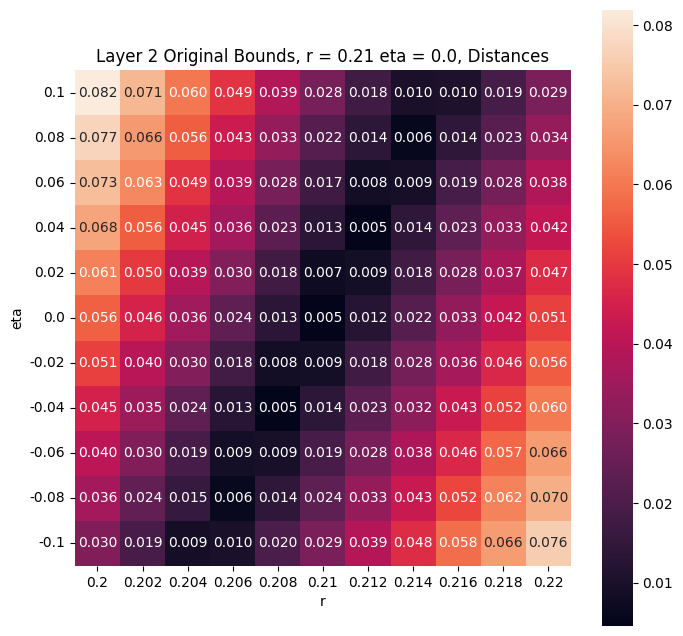

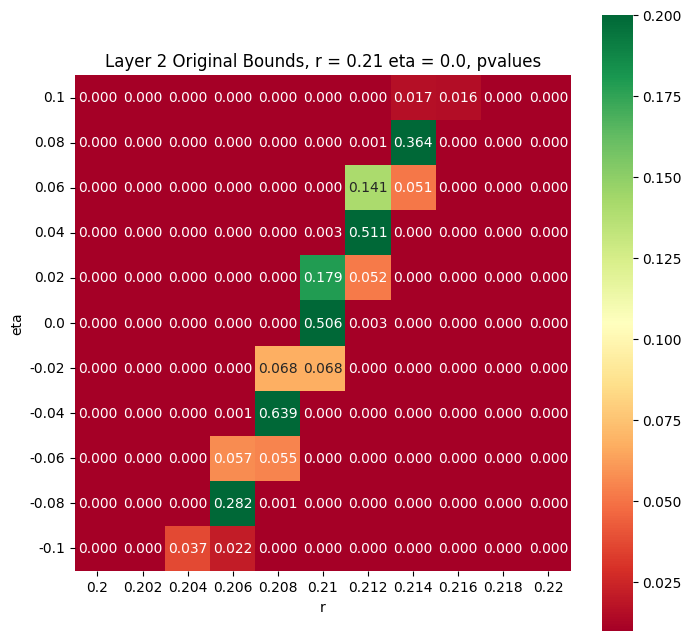

Running process with original bounds
Only 10.743801652892563% of tests passed with the original bounds. Now running with lower r and eta bounds
Trying r_bound = 0.005, eta_bound = 0.005


In [5]:
ks_output_df = pd.DataFrame(columns = ["layer", "inital_r_bound", "inital_eta_bound", "inital_pass_pct", "final_r_bound", "final_eta_bound", "final_pass_pct"])
for group in GROUPS:
    print(f"Testing Layer {group}")
    figs, output = KSHeatMapFullProcess(r = full_params.loc[group, 'initial_r'], eta = full_params.loc[group, 'initial_eta'], n = full_params.loc[group, 'total_samples'], ks_max = sample_max, iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 8, title = f"Layer {group}", return_vals = True, max_iterations = 5, parallelize = True)
    figs[0][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_Plot_layer_{group}_initial_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[0][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_initial_dvalues.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_pvalues.jpg"), bbox_inches = 'tight', dpi=600)
    ks_output_df.loc[len(ks_output_df)] = [group] + output


In [ ]:
prior_cdf = compute_prior_cdf(r, eta, n_samples=1000, tail_percent=0.1, tail_bound=0.0001, debug=False, use_matlab=True, eng=eng)
obs_x = sample_prior(r, eta, size = n)
filtered_x = np.sort(obs_x)[np.round(np.linspace(0, obs_x.size - 1, min(obs_x.size, sample_max))).astype(int)] 

In [ ]:
ks_output_df.to_csv(os.path.join(CWD, "CSVs", 'KS_plot_df.csv'))
ks_output_df

# NEW SAMPLE MAX

In [ ]:
sample_max = int(1e7)
ks_output_df_new = pd.DataFrame(columns = ["layer", "inital_r_bound", "inital_eta_bound", "inital_pass_pct", "final_r_bound", "final_eta_bound", "final_pass_pct"])
for group in GROUPS:
    print(f"Testing Layer {group}")
    figs, output = KSHeatMapFullProcess(r = full_params.loc[group, 'initial_r'], eta = full_params.loc[group, 'initial_eta'], n = full_params.loc[group, 'total_samples'], ks_max = sample_max, iterations = 10, r_bound = 0.01, eta_bound=0.1, grid_amt = 5, rounded = 8, title = f"Layer {group}", return_vals = True, max_iterations = 5, parallelize = True)
    figs[0][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_Plot_layer_{group}_initial_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[0][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_initial_dvalues.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][0].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_distances.jpg"), bbox_inches = 'tight', dpi=600)
    figs[1][1].figure.savefig(os.path.join(CWD, "plots", "ksplots", f"ks_plot_layer_{group}_final_pvalues.jpg"), bbox_inches = 'tight', dpi=600)
    ks_output_df_new.loc[len(ks_output_df_new)] = [group] + output
